<a href="https://colab.research.google.com/github/benjaminnigjeh/keyProteoforms/blob/main/generalized_similarity_search_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import hashlib
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ast
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pickle

np.random.seed(42)
tf.random.set_seed(42)
random.seed(100)

In [3]:
class MinHash:
    def __init__(self, num_hashes=100):
        self.num_hashes = num_hashes
        self.seeds = [random.randint(0, 2**32 - 1) for _ in range(num_hashes)]

    def _hash(self, x, seed):
        return int(hashlib.md5((str(seed) + x).encode('utf8')).hexdigest(), 16)

    def compute(self, set_data):
        min_hashes = [min(self._hash(el, seed) for el in set_data) for seed in self.seeds]
        return min_hashes

    def jaccard_similarity(self, set1, set2):
        min_hash1 = self.compute(set1)
        min_hash2 = self.compute(set2)
        return sum(1 for a, b in zip(min_hash1, min_hash2) if a == b) / self.num_hashes


def hashing(str1, str2):

    n = 3
    set1 = {str1[i:i+n] for i in range(len(str1) - n + 1)}
    set2 = {str2[i:i+n] for i in range(len(str2) - n + 1)}
    minhash = MinHash(num_hashes=100)
    similarity = minhash.jaccard_similarity(set1, set2)
    return(1 - similarity)

def plot_distribution(data):
    if isinstance(data, list):
        data = np.array(data)

    plt.figure(figsize=(10, 6))

    sns.histplot(data, bins=30, kde=True, color='blue', alpha=0.6, stat='density')

    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Distribution of Numbers')

    plt.grid(True)
    plt.show()

def plot_confusion_matrix(model, X_test, y_test):
  y_true = [0 if x < 0.5 else 1 for x in y_test]
  y_pred = [0 if x < 0.5 else 1 for x in model.predict(X_test)]

  cm = confusion_matrix(y_true, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
  disp.plot(cmap=plt.cm.Blues)
  plt.title('Confusion Matrix')
  plt.show()

In [4]:
databank_path = '/content/drive/MyDrive/databank.pkl'

In [5]:
with open(databank_path, 'rb') as f:
  databank = pickle.load(f)

<ipython-input-5-3001639f3231>:2: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  databank = pickle.load(f)


In [45]:
databank.columns

Index(['sample_name', 'group_name', 'separation', 'scan', 'scan_type',
       'retntion time', 'm/z', 'cast spectra', 'sequence', 'MASS',
       'Uniprot ID', 'Accession', 'Modifications'],
      dtype='object')

In [48]:
a = databank['Uniprot ID'].unique()
b = databank['Uniprot ID'].value_counts().reindex(a, fill_value=0).tolist()

sorted_accessions = sorted(zip(a, b), key=lambda x: x[1], reverse=True)

sorted_accessions[1][0]

'HBB_HUMAN'

In [6]:
df = databank.copy()

In [7]:
id = []
sequence = []
cast = []

for i in range(0, len(df['scan'])):
    if df['scan_type'][i] == 'MS2':
        if df['Uniprot ID'][i] != 'None':
            id.append(df['Uniprot ID'][i])
            sequence.append(df['sequence'][i])
            cast.append(df['cast spectra'][i])

ref_seq = 'MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH'

In [8]:
id = id[1000:20000]
sequence = sequence[1000:20000]
cast = cast[1000:20000]

In [9]:
cast_flat = []
hash = []

for i in range(0, len(sequence)):
    print(i)
    cast_flat.append(cast[i])
    hash.append(hashing(sequence[i], ref_seq))

X = np.array(cast_flat)
y = np.array(hash)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)


Streaming output truncated to the last 5000 lines.
14000
14001
14002
14003
14004
14005
14006
14007
14008
14009
14010
14011
14012
14013
14014
14015
14016
14017
14018
14019
14020
14021
14022
14023
14024
14025
14026
14027
14028
14029
14030
14031
14032
14033
14034
14035
14036
14037
14038
14039
14040
14041
14042
14043
14044
14045
14046
14047
14048
14049
14050
14051
14052
14053
14054
14055
14056
14057
14058
14059
14060
14061
14062
14063
14064
14065
14066
14067
14068
14069
14070
14071
14072
14073
14074
14075
14076
14077
14078
14079
14080
14081
14082
14083
14084
14085
14086
14087
14088
14089
14090
14091
14092
14093
14094
14095
14096
14097
14098
14099
14100
14101
14102
14103
14104
14105
14106
14107
14108
14109
14110
14111
14112
14113
14114
14115
14116
14117
14118
14119
14120
14121
14122
14123
14124
14125
14126
14127
14128
14129
14130
14131
14132
14133
14134
14135
14136
14137
14138
14139
14140
14141
14142
14143
14144
14145
14146
14147
14148
14149
14150
14151
14152
14153
14154
14155
14156
14157
1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.1212 - mae: 0.2962 - val_loss: 0.0605 - val_mae: 0.1283
Epoch 2/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0513 - mae: 0.1152 - val_loss: 0.0559 - val_mae: 0.1143
Epoch 3/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0464 - mae: 0.1058 - val_loss: 0.0474 - val_mae: 0.1132
Epoch 4/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0376 - mae: 0.1049 - val_loss: 0.0333 - val_mae: 0.0999
Epoch 5/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0255 - mae: 0.0887 - val_loss: 0.0249 - val_mae: 0.0820
Epoch 6/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0177 - mae: 0.0699 - val_loss: 0.0203 - val_mae: 0.0714
Epoch 7/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0132 - mae: 0.0579 - val_loss: 0.0180 - val_mae: 0.0663
Epoch 8/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0102 - mae: 0.0499 - val_loss: 0.0168 - val_mae: 0.0631
Epoch 9/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.008

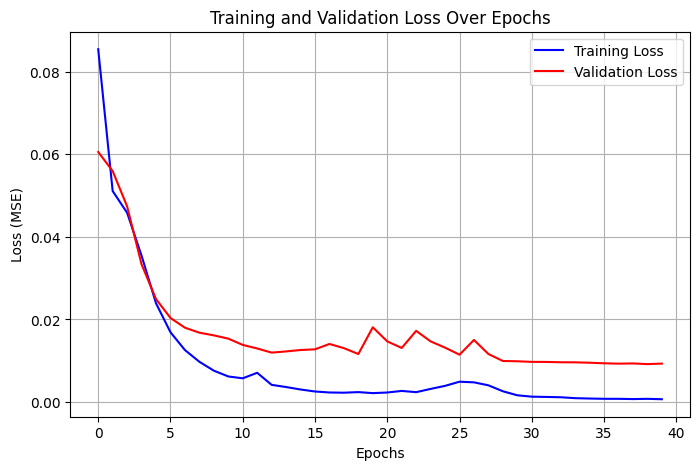

In [15]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(1600,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model and store training history
history = model.fit(X_train, y_train, epochs=40, batch_size=512, validation_split=0.2)

# Evaluate on test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss:.4f}")

# 🎨 Plot loss curve
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Shape mismatch: y_test (2000, 1), y_pred (2000,)


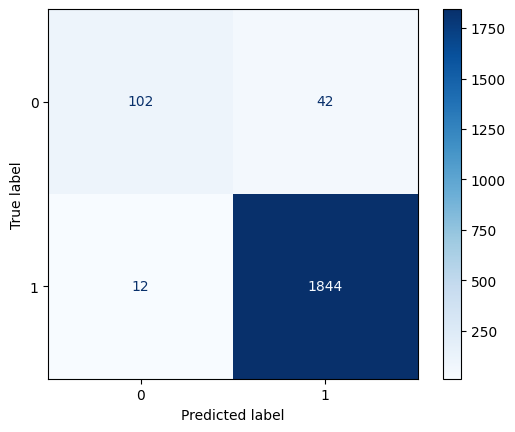

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, X_test, y_test):
    # Ensure y_test is binary (0 or 1)
    #y_test = np.array(y_test).astype(int)  # ✅ Convert to integer if needed
    y_test = np.where(np.array(y_test) > 0.5, 1, 0).astype(int)

    # Get model predictions
    y_scores = model.predict(X_test)

    # Convert predictions to binary labels
    y_pred = (y_scores >= 0.5).astype(int).flatten()  # ✅ Convert float → int

    # Ensure shapes match
    if y_test.shape != y_pred.shape:
        print(f"Shape mismatch: y_test {y_test.shape}, y_pred {y_pred.shape}")
        y_test = y_test.flatten()

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)

    # Show the plot
    plt.show()

# Call the function
plot_confusion_matrix(model, X_test, y_test)

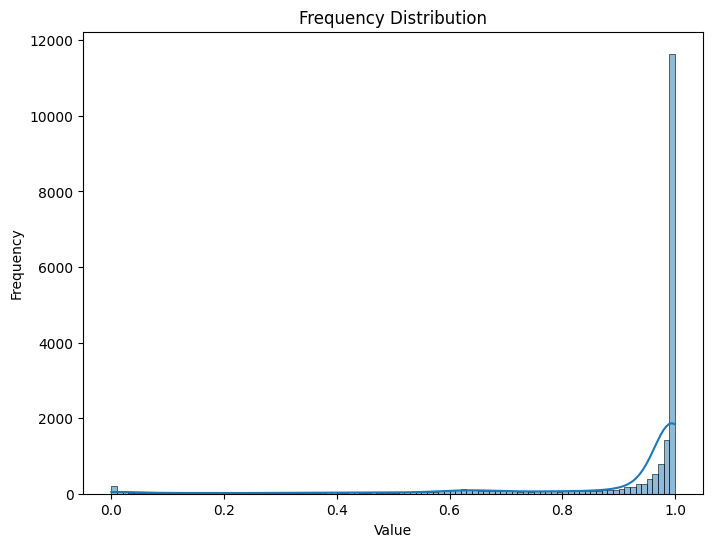

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample data
data = np.array(hash)  # Normally distributed data

# Plot the frequency distribution
plt.figure(figsize=(8, 6))
sns.histplot(data, bins=100, kde=True, color='blue', legend=False)

#plt.yscale('log', base=2)
# Labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

# Show the plot
plt.show()


In [13]:

cast = []

for i in range(0, len(df['scan'][100000:120000])):
    if df['scan_type'][i] == 'MS2':
          cast.append(df['cast spectra'][i])

hash = model.predict(np.array(cast))


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [14]:
X = np.array(cast)
y = np.array(hash)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)


In [ ]:
cast = []

for i in range(0, len(df['scan'])):
    if df['scan_type'][i] == 'MS2':
      if df['Uniprot ID'][i] == 'None':
          cast.append(df['cast spectra'][i])

hash = model.predict(np.array(cast))

a = 0
b = 0

for i in range(0, len(hash)):
  if hash[i] > 0.5:
    a += 1
  else:
    b += 1

print(a)
print(b)